# Medical imaging encompasses technologies like ultrasonography, x-rays, mammography, computed tomography (CT scans), and nuclear medicine. Medical imaging is crucial in a variety of medical settings and at all major levels of health care.
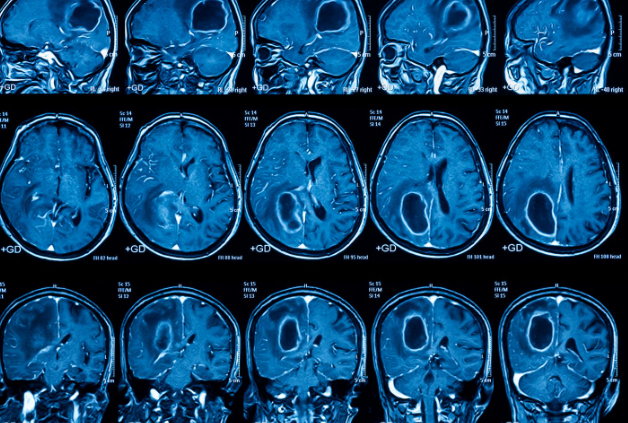

## Data Formats and Preprocessing

### General file formats

1] DICOM The Digital Imaging and Communications in Medicine (DICOM) Standard specifies a non-proprietary data interchange protocol, digital image format, and file structure for biomedical images and image-related information.

->Libraries used[pydicom,simpleITK]

2] NIFTI NIfTI (Neuroimaging Informatics Technology Initiative) is a data format for the storage of Functional Magnetic Resonance Imaging (fMRI) and other medical images. The NIfTI format is adapted from Analyze™ 7.5, developed by Biomedical Imaging Resource (BIR) at Mayo Clinic.

->Libraries used[nibabel]


#### DICOM-> Pydicom

In [14]:
#DICOM
#dataset link https://www.kaggle.com/datasets/kmader/siim-medical-images
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt

In [5]:
dicom_file=pydicom.read_file('dataset/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm')

In [7]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

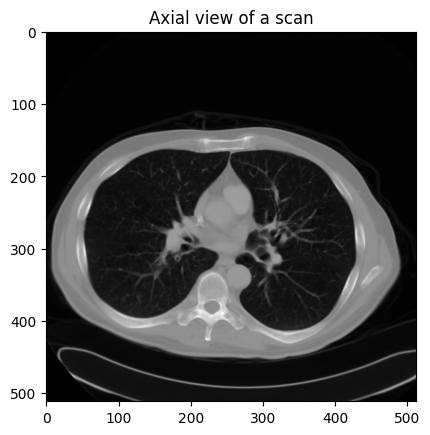

In [12]:
ct_image=dicom_file.pixel_array
plt.imshow(ct_image,cmap='gray')
plt.title('Axial view of a scan');

In [19]:
path_to_head_mri=Path('dataset/dicom_dir/')
all_files=list(path_to_head_mri.glob("*"))
all_files[:10]

[PosixPath('dataset/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm'),
 PosixPath('dataset/dicom_dir/ID_0001_AGE_0069_CONTRAST_1_CT.dcm'),
 PosixPath('dataset/dicom_dir/ID_0002_AGE_0074_CONTRAST_1_CT.dcm'),
 PosixPath('dataset/dicom_dir/ID_0003_AGE_0075_CONTRAST_1_CT.dcm'),
 PosixPath('dataset/dicom_dir/ID_0004_AGE_0056_CONTRAST_1_CT.dcm'),
 PosixPath('dataset/dicom_dir/ID_0005_AGE_0048_CONTRAST_1_CT.dcm'),
 PosixPath('dataset/dicom_dir/ID_0006_AGE_0075_CONTRAST_1_CT.dcm'),
 PosixPath('dataset/dicom_dir/ID_0007_AGE_0061_CONTRAST_1_CT.dcm'),
 PosixPath('dataset/dicom_dir/ID_0008_AGE_0051_CONTRAST_1_CT.dcm'),
 PosixPath('dataset/dicom_dir/ID_0009_AGE_0048_CONTRAST_1_CT.dcm')]

In [20]:
mri_data=[]
for path in all_files:
    data=pydicom.read_file(path)
    mri_data.append(data)

In [22]:
#Checking if all slices are ordered or shuffeled(Its shuffeled)
for slice in mri_data[:5]:
    print(slice.SliceLocation)

-247.5
-220
104
-260
116


In [24]:
mri_data_ordered=sorted(mri_data,key=lambda slice:slice.SliceLocation)
for slice in mri_data_ordered[:5]:
    print(slice.SliceLocation)

-1168.4
-948.5
-948.2
-918.5
-901


In [25]:
full_images=[]
for slice in mri_data_ordered:
    full_images.append(slice.pixel_array)

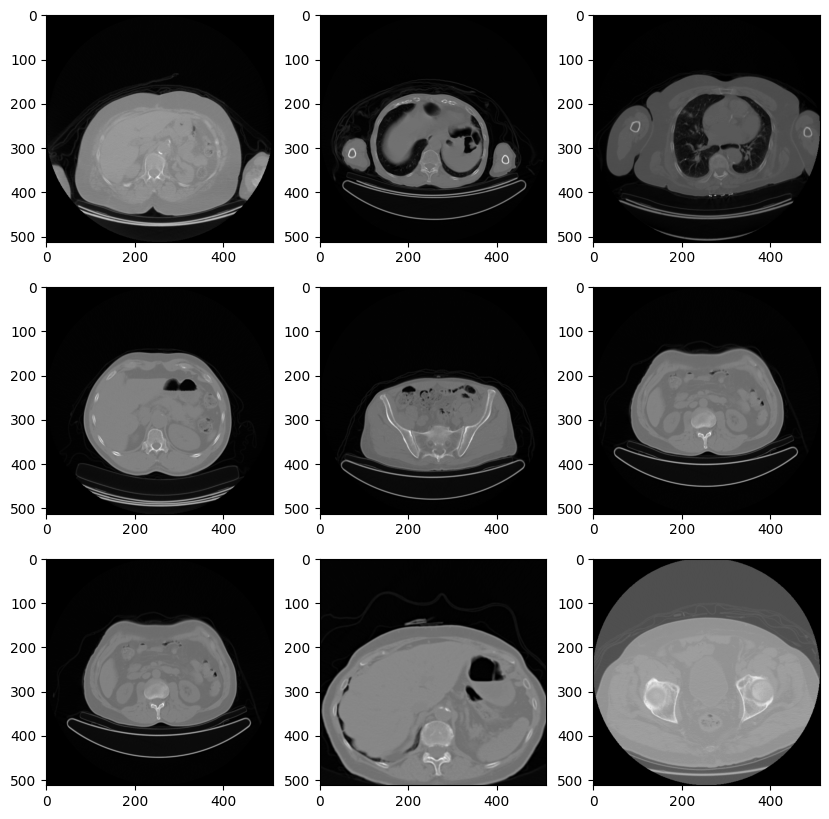

In [32]:
fig,ax=plt.subplots(3,3,figsize=(10,10))
c=0
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(full_images[c],cmap='gray')
        c+=1

#### DICOM-> Simpleitk

In [35]:
import SimpleITK as sitk

In [36]:
series_ids=sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
series_ids

('1.3.6.1.4.1.14519.5.2.1.3023.4012.102289758600639081883682341599',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.111970507245102440072981773069',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.154470741269083988898569715734',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.251486101984782457779149100338',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.281222452204153314922270968637',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.297267439816180432188742253053',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.513523794062613324810980652054',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.648531603410109839170055154074',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.695837418985624676340861607694',
 '1.3.6.1.4.1.14519.5.2.1.6450.4012.153444090734536905415278769671',
 '1.3.6.1.4.1.14519.5.2.1.6450.4012.175016803370372621275285549100',
 '1.3.6.1.4.1.14519.5.2.1.6450.4012.185965196167856618864777448062',
 '1.3.6.1.4.1.14519.5.2.1.6450.4012.200234714530375524999580843628',
 '1.3.6.1.4.1.14519.5.2.1.6450.4012.249320450296411760831322037482',
 '1.3.6.1.4.1.14519.5.2.1.6450.401

In [40]:
series_file_names=sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri),series_ids[1])
series_file_names

('dataset/dicom_dir/ID_0025_AGE_0074_CONTRAST_1_CT.dcm',)

In [42]:
series_reader=sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)
image_data=series_reader.Execute()

In [43]:
head_mri=sitk.GetArrayFromImage(image_data)
head_mri.shape

(1, 512, 512)

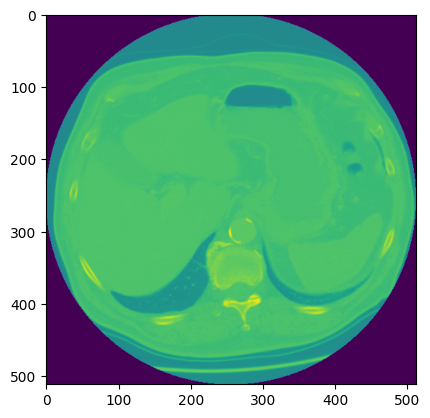

In [46]:
plt.imshow(head_mri[0]);

#### NIFTI -> nibabel

In [54]:
import nibabel as nib

In [55]:
nifti=nib.load('dataset/avg152T1_LR_nifti.nii')

In [57]:
print(nifti)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine:
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='>'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 255.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL3.2beta'
aux_file        : b'none                   '
qform_code     

In [58]:
nifti.shape

(91, 109, 91)

In [59]:
image_array=nifti.get_fdata()

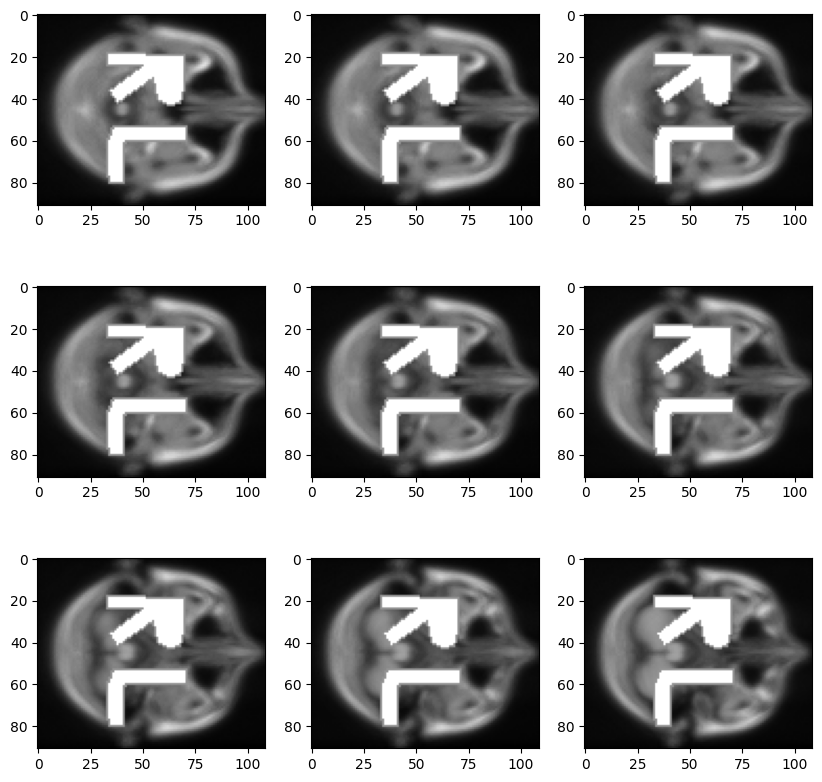

In [60]:
fig,ax=plt.subplots(3,3,figsize=(10,10))
c=0
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(image_array[:,:,c],cmap='gray')
        c+=1

In [71]:
image_array_processed=image_array*(image_array>150)

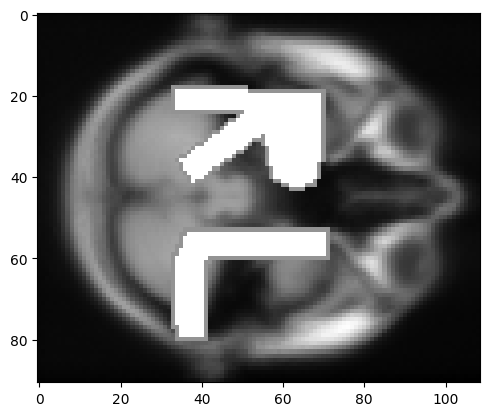

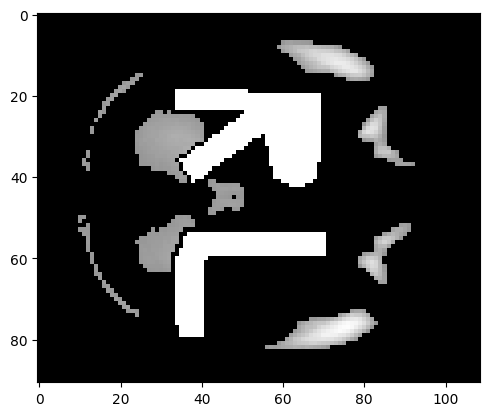

In [72]:
plt.figure()
plt.imshow(image_array[:,:,13],cmap='gray')
plt.figure()
plt.imshow(image_array_processed[:,:,13],cmap='gray');

In [73]:
processed_nifti=nib.Nifti1Image(image_array_processed,nifti.affine)

In [74]:
nib.save(processed_nifti,'dataset/avg152T1_LR_nifti_processed.nii')